# Artificial Neuron - Linear Regression | Practical Session Part II

## 1 Introduction

In the first jupyter notebook of this week's practical session, general tensorflow principles were introduced. With the information from that notebook, simple computational graphs can be defined and executed using tensorflow.

This jupyter notebook is the second of three parts of the practical session "Introduction to Artificial Neural Networks". It helps you to apply the concepts of the first notebook while simoultaneously deeping your understanding of the artificial neuron which was presented in the corresponding lecture. 
These two goals of this notebook are achieved by a mini linear regression project. In this mini project you will define an artificial neuron using tensorflow and train it to find a regression for a sample dataset in three dimensions.

### 1.1 Imports

Please make sure that you have installed the following packages which we need for this notebook. Note that the mpl_toolkits module is part of the matplotlib module (i.e. if you have already installed matplotlib, you do not need to install anything else)

In [3]:
import tensorflow as tf
import numpy as np

# Used for plotting purposes
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random # Used to generate artificially noised data

### 1.2 General Idea

As known from the introduction of this jupyter notebook, a linear regression project shall be implemented by the use of an artificial neuron generated and trained with tensorflow. To give you an overview over the contents of this notebook, a simple outline shall prepare you for what is going to happen: 

    1. Artifical training data is generated in chapter 2
        - The training data is situated in a three dimensional space
        - The training data is designed to approximately lie on a known geometric plane 
        - The training data data is superimposed by noise
        
    2. An artificial neuron is created using tensorflow in chapter 3
        - The artificial neuron shall later be trained to find a regression that approximates the x3 component
    
    3. The artificial neuron is trained using the training data in chapter 4
    
    4. The regression results are examined in chapter 5
        - The results are being visualized
        - The parameters found by the regression are compared to the known parameters used for data generation

## 2 Data Generation

When solving regression tasks in real life, input data sets do not have to be generated artificially. In order to examine the results of different input data sets and regression options however, artificial data generation is helpful for purposes of testing and understanding. Hence, an artificial dataset shall be generated in section 2.1 and visualized in section 2.2.

### 2.1 Data Generation

In the following code block, an artificial dataset is generated. Feel free to fiddle with the generation parameters in order to generate different datasets and observe how changes in the input data affect the outcome of the linear regression.

In [4]:
# Options for coefficients defining the original plane in which the training data lies
PLANE_COEFF_1 = -2
PLANE_COEFF_2 = -4
PLANE_COEFF_3 = 3

# Noise Amplitude
NOISE_AMP = 2

# Generate data in 3 dimensions that can be approximated by a plane
x1_data, x2_data = np.meshgrid(np.linspace(-5, 5, 6), np.linspace(-5, 5, 6))
y_hat_data = PLANE_COEFF_1 * x1_data + PLANE_COEFF_2 * x2_data + PLANE_COEFF_3

# Add noise to data
for i, value in np.ndenumerate(y_hat_data):
    y_hat_data[i] = value + random.uniform(-5,5)

# Vectorize x1, x2 and y_hat
x1_data = x1_data.flatten()
x2_data = x2_data.flatten()
y_hat_data = y_hat_data.flatten()

# Make x1, x2 and y_hat tensorflow compliant
x1_data = x1_data[:, np.newaxis]
x2_data = x2_data[:, np.newaxis]
y_hat_data = y_hat_data[:, np.newaxis]

### 2.2 Data Visualization

Before we define the artificial neuron to solve the regression task, a quick look at the regression dataset helps to understand the problem better. 

<IPython.core.display.Javascript object>


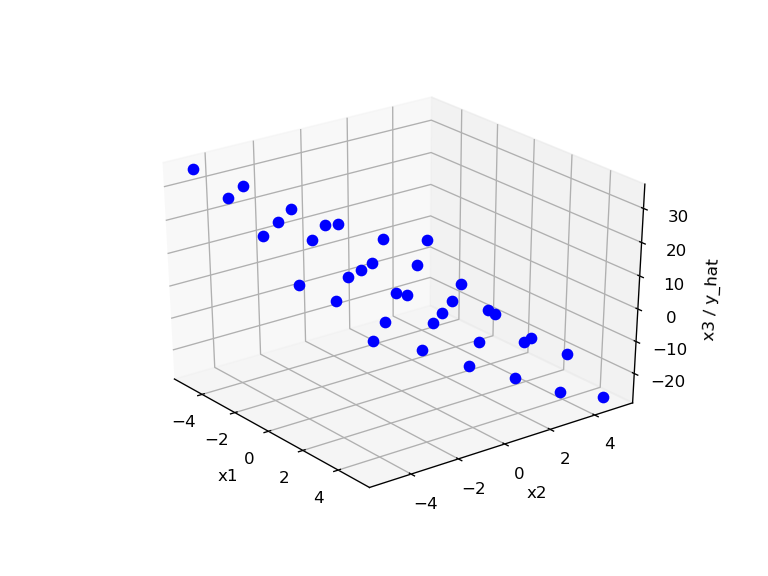

Text(0.5,0,'x3 / y_hat')

In [9]:
# Plot the artificial dataset
%matplotlib notebook 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_data[:,0], x2_data[:,0], y_hat_data[:,0], 'bo ')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3 / y_hat')

## 3 Artificial Neuron

It is known from the lecture that single artificial neurons can perform linear regression tasks. Therefore, this chapter aims at setting up a tensorflow representation of an artificial neuron that can later be used to solve the linear regression task using the previously generated artificial dataset.

### 3.1 Computational Graph

Analog to the first jupyter notebook of this practical session, the task of setting up an artificial neuron using tensorflow shall be prepared by sketching the necessary computational graph for the corresponding neuron first. A suitable computational graph for the linear regression task of this notebook may look like this:

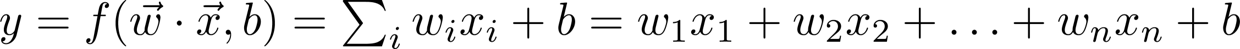

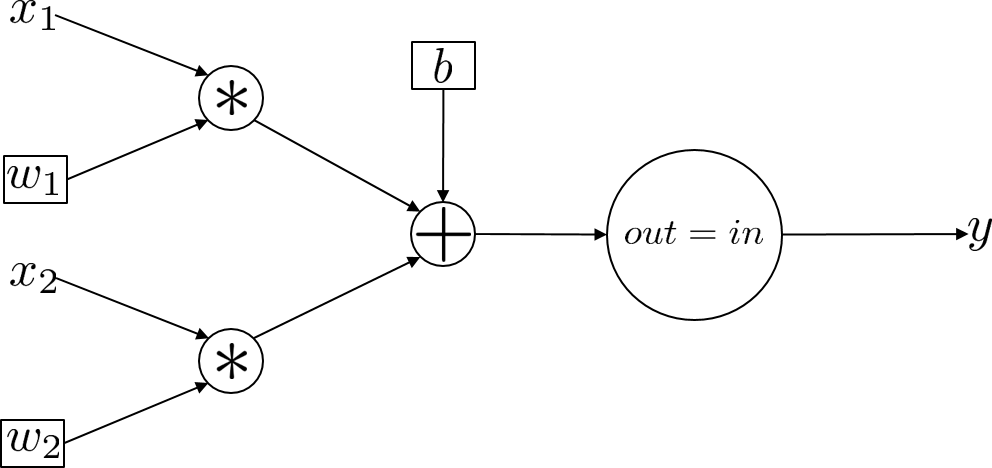

As mentioned in the lecture, the identity activation function is the right choice when using an artificial neuron to perform a linear regression task. It is denoted by the out=in node in the computational graph.

### 3.2 Tensorflow Translation

The code block below translates the computational graph from section 3.1 to a tensorflow graph using placeholders variables and operations.

In [10]:
# Define placeholders (Inputs)
x1 = tf.placeholder(tf.float32, name = "x1")
x2 = tf.placeholder(tf.float32, name = "x2")

# Define placeholder expected output
y_hat = tf.placeholder(tf.float32, name = "y_hat")

# Define weights
w1 = tf.Variable(0.0, name = "w1")
w2 = tf.Variable(0.0, name = "w2")

# Define bias
b = tf.Variable(0.0, name = "b")

# Define operations without activation function
w1x1 = tf.multiply(w1, x1, name = "w1x1")
w2x2 = tf.multiply(w2, x2, name = "w2x2")
y_tilde = tf.add(w1x1, w2x2)+b

# Activation function
y = y_tilde

## 4 Training of the Artificial Neuron

Up to this point, artificial training data was generated and a static tensorflow graph modelling an artificial neuron was defined. This chapter deals with the training process of the artificial neuron. During the training process, the training data is presented to the artificial neuron and the weights and biases of the artificial neuron are adjusted using gradient descent.

### 4.1 Loss Function

In order to perform a weight/bias update using the gradient descent method, a loss function has to be defined. The loss functon used in this exercise is the same as the one generated in the first jupyter notebook of this practical session. It will therefore not be explained again.

In [11]:
# Define constant
c = tf.constant(0.5, name = "c")

# Define loss function (see other jupyter notebook)
o1 = tf.negative(y_hat)
o2 = tf.add(o1, y)
o3 = tf.math.pow(o2, 2)
o4 = tf.multiply(o3, c)
L = o4

### 4.2 Optimizer

During the lecture, gradient descent was introduced as an iterative numerical approach to update weights and biases in artificial neurons. Although it would be possible to implement a gradient descent method using basic tensorflow expressions, it is much more convinient to use the already implemented tensorflow version of gradient descent. 

The following code snippet shows how to make use of the gradient descent optimizer in tensorflow. In this example, the gradient descent optimizer is told to minimize the mean of a set of losses. This is sensible, because we will calculate multiple losses at once, check the mean of these losses, update the weights according to the mean of the losses, generate a new set of losses and so on. This approach is called batch training. It is more robust against outliers, because it prevents weight updates to be influenced by outliers to much while still updating weights and biases reasonably often.

In [12]:
# Learning rate options to try different learning rates
LEARNING_RATE = 0.003

# Defining an optimizer to adjust weights and biases, minimizing L
optimizer = tf.train.GradientDescentOptimizer(learning_rate = LEARNING_RATE).minimize(tf.reduce_mean(L))

### 4.3 Training

After all preparations have been concluded, the artificial neuron can be trained using the training dataset. Remember that we are using a batch training approach here (see section 4.2). We also train multiple epochs (e.g. we present the whole data set multiple times to the neuron). 

Feel free to experiment with the number of epochs and the batchsize.

In [13]:
# Training Options
EPOCHS = 300
BATCHSIZE = 3

# Define a variable initializer
ini = tf.global_variables_initializer()

# List to store the loss history
loss_history = []

# Train the Neuron
with tf.Session() as sess:
    
    sess.run(ini)
    
    # Present the data multiple times (epochs) to the Neuron
    for e in range(EPOCHS):
        
        # Train in batches (i.e. update the weights and bias by minimizing the mean loss after a couple of samples)
        for index, offset in enumerate(range(0, x1_data.shape[0], BATCHSIZE)):
            
            # Cut out current batch
            x1_batch = x1_data[offset: offset + BATCHSIZE]
            x2_batch = x2_data[offset: offset + BATCHSIZE]
            y_hat_batch = y_hat_data[offset: offset + BATCHSIZE]
            
            # Define input to the Neuron
            feed_in = {x1: x1_batch, x2: x2_batch, y_hat: y_hat_batch}
            
            # Evaluate terms and train Neuron
            _,loss, weight1, weight2, bias = sess.run([optimizer, L, w1, w2, b], feed_dict=feed_in)
            
        # Keep track of the loss every epoch
        loss_history.append(np.mean(loss))

## 5 Results

The last chapter of this notebook visualizes the training results, to assess the quality with which the artificial neuron was trained to from a regression of the training data set. 

### 5.1 Loss History

First of all, let's take a look at the loss history: 

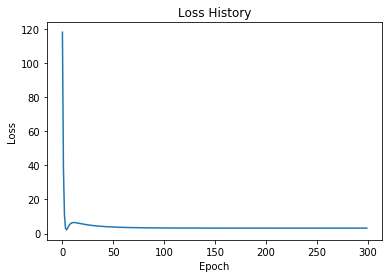

In [14]:
%matplotlib inline
plt.plot(list(range(EPOCHS)), loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.show()

### 5.2 Visualization

Secondly, the regression quality can be inspected visually by plotting the regression plane defined by the weights and biases of the artifical neuron and checking, whether it matches the input data. 


Please also have a look at the parameters that were used to generate the training dataset and the values of the weights and biases after the neuron was trained. 

<IPython.core.display.Javascript object>


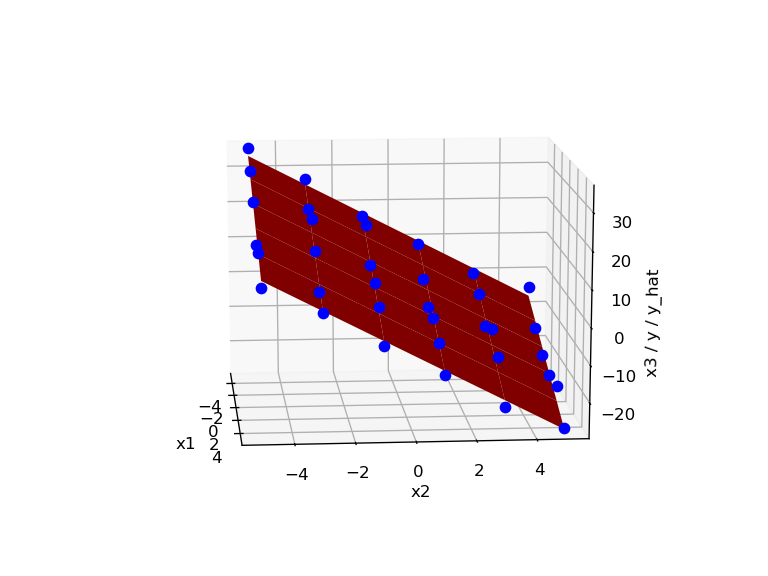

Original Coefficients : 
coeff1 =  -2
coeff2 =  -4
coeff3 =  3

Trained weights / bias : 
w1 =  -2.1069798
w2 =  -4.0792913
b =  2.6808615


In [16]:
# Calculated regression values
regression_y = weight1 * x1_data.reshape((6,6)) + weight2 * x2_data.reshape((6,6)) + bias

# Plot regression result
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_data[:,0], x2_data[:,0], y_hat_data[:,0], 'bo ')
ax.plot_surface(x1_data[:,0].reshape((6,6)), x2_data[:,0].reshape((6,6)), regression_y, color = 'r', cmap=None)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3 / y / y_hat')

# Comparing original data coefficients and trained weights / biases
print("Original Coefficients : ")
print("coeff1 = ", PLANE_COEFF_1)
print("coeff2 = ", PLANE_COEFF_2)
print("coeff3 = ", PLANE_COEFF_3)

print("\nTrained weights / bias : ")
print("w1 = ", weight1)
print("w2 = ", weight2)
print("b = ", bias)

## 6 Evaluation

Please evaluate the "Introduction to Neural Networks" practical sessions and lecture using either the link: 

https://evasys.zv.tum.de/evasys/online.php?p=AIAT-7

or the QR code:

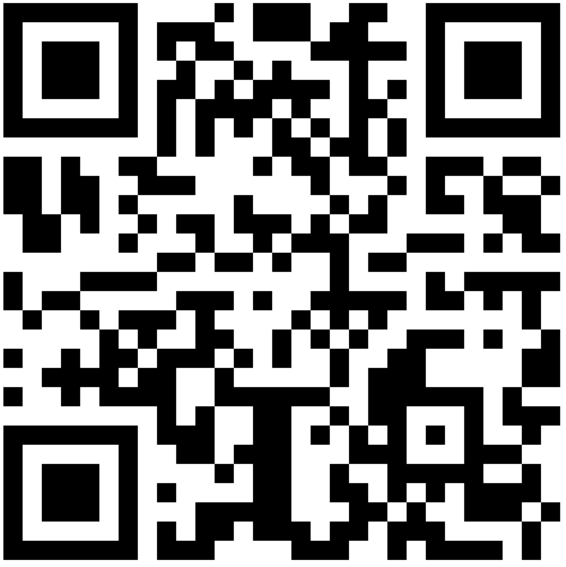